# Implementação computacional de um CAPM (Sharpe, 1964)

O primeiro passo para a implementação computacional do Capital Asset Pricing Model, de William F. Sharpe (1964), é a importação de uma série de pacotes que serão utilizados durante o processo. Importaremos os seguintes pacotes: Pandas, Matplotlib, NumPy, YahooFinancials (1.5) e o StatsModels.

In [131]:
# Importação dos pacotes

import quandl as qd
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from yahoofinancials import YahooFinancials
import statsmodels.api as sm

##import quandl as qd

Iremos inicialmente definir duas variáveis de nosso interesse: a ação desejada (em nosso caso, a USIM5.SA) e a Taxa de Retorno do Mercado (em nosso caso, a Ibovespa). Cada variável conterá o nome do seu respectivo ticker de acordo com a plataforma Yahoo Finance. Essas variáveis serão utilizadas posteriormente para a captura de suas respectivas séries históricas utilizando o YahooFinancials.

In [132]:
# Definindo variáveis

USI = ['USIM5.SA']
IBOV = ['^BVSP']

Definiremos agora três novas variáveis que funcionarão como parâmetros para a função de captura das séries históricas de nosso interesse. O primeiro parâmetro (start_date) é a data de início da série histórica desejada. Seguindo a lógica, o segundo parâmetro (end_date) marca a data final da série histórica. A última variável (period) marca a frequência desejada de captura de valores.

In [133]:
# Definindo parâmetros

start_date = '2000-01-01'  
end_date = '2018-12-31' 
period = 'daily'  

Agora utilizaremos propriamente o pacote YahooFinancials. Definiremos, em um primeiro momento, duas novas variáveis (IBOV_YF e USI_YF) que "chamarão" o pacote utilizando as variáveis definidas anteriormente. 

Na sequência, definiremos outras duas variáveis (IBOV_hist e USI_hist) que utilizarão uma função específica do pacote (get_historical_price_data) para realizar a captura dos preços históricos das nossas variáveis utilizando os parâmetros definidos anteriormente (start_date, end_date e period).

In [134]:
# Definindo novas variáveis e capturando histórico de preços

IBOV_YF = YahooFinancials(IBOV)
USI_YF = YahooFinancials(USI)

IBOV_hist = IBOV_YF.get_historical_price_data(start_date, end_date, period)
USI_hist = USI_YF.get_historical_price_data(start_date, end_date, period)

Temos agora, nessas duas novas variáveis, uma série de dados sobre os preços diários da USIM5.SA e da Ibovespa. Contudo, o pacote YahooFinancials provê essas informações no formato JSON. Para podermos trabalhar com os valores obtidos, teremos de transformar os dados de JSON para DataFrame. Para tanto, utilizaremos o pacote Pandas importado no início do processo.

Duas novas variáveis (IBOV_df1 e USI_df1) serão definidas a partir do recurso DataFrame do pacote Pandas e das variáveis IBOV_hist e USI_hist (estas que contém as variáveis que desejamos). 

In [135]:
# Utilizando a função DataFrame do pacote Pandas

IBOV_df1 = pd.DataFrame(IBOV_hist['^BVSP']['prices'])
USI_df1 = pd.DataFrame(USI_hist['USIM5.SA']['prices'])

Podemos verificar como nossas novas variáveis estão printando-as:

In [136]:
# Printando as variáveis

print(IBOV_df1.head())
print(USI_df1.head())

   adjclose    close       date formatted_date     high      low     open  \
0   16930.0  16930.0  946900800     2000-01-03  17408.0  16719.0  17098.0   
1   15851.0  15851.0  946987200     2000-01-04  16908.0  15851.0  16908.0   
2   16245.0  16245.0  947073600     2000-01-05  16302.0  15350.0  15871.0   
3   16107.0  16107.0  947160000     2000-01-06  16499.0  15977.0  16237.0   
4   16309.0  16309.0  947246400     2000-01-07  16449.0  16125.0  16125.0   

   volume  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
   adjclose    close       date formatted_date     high      low     open  \
0  1.884573  2.13333  946900800     2000-01-03  2.18000  2.12222  2.17778   
1  1.815871  2.05556  946987200     2000-01-04  2.11111  2.05556  2.11111   
2  1.988619  2.25111  947073600     2000-01-05  2.25556  2.05556  2.06667   
3  2.169229  2.45556  947160000     2000-01-06  2.45556  2.22222  2.22222   
4  2.255598  2.55333  947246400     2000-01-07  2.57778  2.44444  2.45556   

  

Agora iremos criar duas variáveis (IBOV_df2 e USI_df2) utilizando apenas a coluna de nosso interesse de ambas as variáveis: a coluna "adjclose". Utilizaremos a função Concat do Pandas para tanto. Ainda, definiremos o eixo em 1.

In [137]:
# Utilizando o Pandas para definir novas variáveis contendo os preços de fechamento

IBOV_df2 = pd.concat([IBOV_df1['adjclose']], axis = 1)
USI_df2 = pd.concat([USI_df1['adjclose']], axis = 1)

Novamente, podemos verificar nosso trabalho printando as novas variáveis:

In [138]:
# Printando as variáveis 

print(IBOV_df2.head())
print(USI_df2.head())

   adjclose
0   16930.0
1   15851.0
2   16245.0
3   16107.0
4   16309.0
   adjclose
0  1.884573
1  1.815871
2  1.988619
3  2.169229
4  2.255598


Até agora tudo está conforme gostaríamos.

O próximo passo é calcular a variação diária das variáveis. Utilizaremos a função "pct_change" do pacote Pandas para obtermos a variação diária de ambas as variáveis (variável "retorno_mensal") e excluiremos a primeira linha dessa variável utilizando o "dropna".

Também podemos printar ambas as variáveis para conferência.

In [139]:
# Calculando a variação diária das variáveis

IBOV_retorno_diario = IBOV_df2.pct_change(1) 
IBOV_retorno_diario_l = IBOV_retorno_diario.dropna(axis=0)

USI_retorno_diario = USI_df2.pct_change(1) 
USI_retorno_diario_l = USI_retorno_diario.dropna(axis=0)

print(IBOV_retorno_diario_l.head())
print(USI_retorno_diario_l.head())

   adjclose
1 -0.063733
2  0.024856
3 -0.008495
4  0.012541
5  0.043718
   adjclose
1 -0.036455
2  0.095132
3  0.090821
4  0.039816
5  0.103571


Finalmente, poderemos realizar a regressão por MQO das variáveis visando encontrar o Beta de mercado utilizando o pacote StatsModels.

Definiremos os retornos diários da USIM5.S.A como Y_USI (variável dependente) e os retornos diários do Ibovespa como X_IBOV (variavel independente). Ainda, adicionaremos uma constante de regressão (Alfa de Jensen) à variável independente, que será estatisticamente testada.

In [140]:
# Definindo variável dependente e independente

Y_USI = USI_retorno_diario_l
X_IBOV = IBOV_retorno_diario_l

Xa = sm.tools.add_constant(X_IBOV)

Definiremos uma nova variável chamada CAPM. Essa variável será a responsável pela regressão por MQO entre a variável dependente e independente definidas anteriormente. A regressão será feita pela função OLS do pacote StatsModels. O resultado da regressão, bem como os principais testes, serão apresentados atráves do print da função Summary. 



In [141]:
# Regredindo as variáveis

CAPM = sm.OLS(Y_USI,Xa)
CAPM_r = CAPM.fit()
print(CAPM_r.summary())

                            OLS Regression Results                            
Dep. Variable:               adjclose   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     2985.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:22:21   Log-Likelihood:                 10598.
No. Observations:                4785   AIC:                        -2.119e+04
Df Residuals:                    4783   BIC:                        -2.118e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.777      0.4

O sumário da regressão apresenta alguns resultados importância sobre a significância estatística do modelo, tais como: R-quadrado padrão e ajustado, a estatística F e sua probabilidade, os valores de Alfa e Beta e seus respectivos desvios padrões e estatísticas t (além de seus p-valores)e os testes de Durbin-Watson e Jarque-Bera.

Contudo, alguns testes adicionais são bem-vindos para verificar a significância do modelo. Esses testes fazem uso dos resíduos da regressão, que podem ser obtidos através da função Resid do StatsModels. Definiremos então uma nova variável "Res" contendo os resíduos de interesse.

In [142]:
# Obtendo os resíduos do modelo

Res = CAPM_r.resid

O primeiro passo interessante é plotar um Autocorrelograma dos resíduos da regressão. Faremos isso utilizando o pacote Matplotlib:

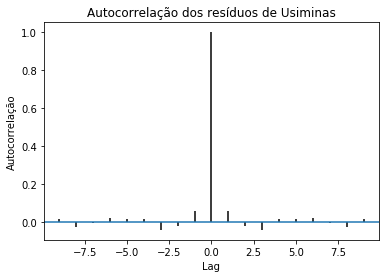

In [143]:
# Plotando um Autocorrelograma dos Resíduos da regressão

plot.acorr(Res, maxlags=9)

plot.title('Autocorrelação dos resíduos de Usiminas')
plot.xlabel('Lag')
plot.ylabel('Autocorrelação')

plot.show()

Também podemos utilizar o pacote StatsModels para testarmos a autocorrelação dos resíduos da regressão obtida através do Teste de Ljung-Box. 

In [144]:
# Teste Ljung-Box de Autocorrelação de Resíduos

LJ = sm.stats.diagnostic.acorr_ljungbox(Res)
print(LJ)

(array([15.25141534, 17.06005523, 25.22396724, 26.68057665, 28.08301407,
       30.22167815, 30.297831  , 33.8625038 , 34.90582117, 35.53408292,
       35.53501412, 35.63803712, 35.96740294, 36.10474055, 36.25931129,
       36.60906503, 37.73253554, 43.97584799, 52.35283067, 54.38281606,
       55.08386162, 60.74981326, 68.94530332, 69.4991444 , 69.53788252,
       70.20786841, 71.58268886, 71.60807914, 71.66868715, 78.80672474,
       80.04471544, 91.83851167, 91.9649328 , 92.16699869, 94.02173461,
       94.02617655, 94.19038649, 94.6795769 , 94.81478333, 96.12132288]), array([9.41062094e-05, 1.97449517e-04, 1.38619946e-05, 2.30645124e-05,
       3.50636132e-05, 3.56715748e-05, 8.37269026e-05, 4.30243087e-05,
       6.19058680e-05, 1.01187673e-04, 2.02146369e-04, 3.70356164e-04,
       6.00297560e-04, 1.00641806e-03, 1.62167385e-03, 2.37955448e-03,
       2.67442086e-03, 5.81503469e-04, 5.85761441e-05, 5.07506735e-05,
       6.87300614e-05, 1.72987996e-05, 1.76746255e-06, 2.60312458e

Por fim, podemos detectar a presença de heteroscedasticidade no modelo através do Teste de Breusch-Pagan. O pacote StatsModels também permite realizar o teste:

In [145]:
# Teste Breusch-Pagan de Heteroscedasticidade

BP = sm.stats.diagnostic.het_breuschpagan(Res,Xa)
print(BP)

(10.271932971386887, 0.001350692177024193, 10.289728485567348, 0.0013465485033298263)
